In [3]:
##### Imports ######
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd


In [9]:
birds = pd.read_csv('./birds2025.csv', sep=';')
birds.head()

,species,group,length,wspan,weight,AR,wload,back,belly,ftype
0,naurulokki,laridae,34-38,86-99,200-350,8.13,0.31,light grey,white,B
1,harmaalokki,laridae,55-65,123-148,800-1300,8.24,0.64,bluish grey,white,B
2,isolokki,laridae,63-68,138-158,1000-1800,8.24,0.66,bluish grey,white,B
3,kalatiira,sternidae,36-42,70-80,100-145,9.14,0.24,grey,white,B
4,lapintiira,sternidae,33-37,66-77,90-130,8.97,0.20,grey,white,B


In [14]:
def meanval(a: str) -> float:
    a_split = a.split('-')
    return (float(a_split[0]) + float(a_split[1])) / 2

In [19]:
birds['mean_length'] = birds['length'].apply(lambda x: meanval(x))
birds['mean_wspan'] = birds['wspan'].apply(lambda x: meanval(x))
birds['mean_weight'] = birds['weight'].apply(lambda x: meanval(x))
birds.head()

,species,group,length,wspan,weight,AR,wload,back,belly,ftype,mean_length,mean_wspan,mean_weight
0,naurulokki,laridae,34-38,86-99,200-350,8.13,0.31,light grey,white,B,36.0,92.5,275.0
1,harmaalokki,laridae,55-65,123-148,800-1300,8.24,0.64,bluish grey,white,B,60.0,135.5,1050.0
2,isolokki,laridae,63-68,138-158,1000-1800,8.24,0.66,bluish grey,white,B,65.5,148.0,1400.0
3,kalatiira,sternidae,36-42,70-80,100-145,9.14,0.24,grey,white,B,39.0,75.0,122.5
4,lapintiira,sternidae,33-37,66-77,90-130,8.97,0.20,grey,white,B,35.0,71.5,110.0


In [20]:
birds['BMI'] = (birds['mean_weight'] / 1000) / (birds['mean_length'] / 100) ** 2
birds.head()

,species,group,length,wspan,weight,AR,wload,back,belly,ftype,mean_length,mean_wspan,mean_weight,BMI
0,naurulokki,laridae,34-38,86-99,200-350,8.13,0.31,light grey,white,B,36.0,92.5,275.0,2.121914
1,harmaalokki,laridae,55-65,123-148,800-1300,8.24,0.64,bluish grey,white,B,60.0,135.5,1050.0,2.916667
2,isolokki,laridae,63-68,138-158,1000-1800,8.24,0.66,bluish grey,white,B,65.5,148.0,1400.0,3.263213
3,kalatiira,sternidae,36-42,70-80,100-145,9.14,0.24,grey,white,B,39.0,75.0,122.5,0.805391
4,lapintiira,sternidae,33-37,66-77,90-130,8.97,0.20,grey,white,B,35.0,71.5,110.0,0.897959


In [21]:
birds['WSI'] = birds['mean_wspan'] / birds['mean_length']
birds.head()

,species,group,length,wspan,weight,AR,wload,back,belly,ftype,mean_length,mean_wspan,mean_weight,BMI,WSI
0,naurulokki,laridae,34-38,86-99,200-350,8.13,0.31,light grey,white,B,36.0,92.5,275.0,2.121914,2.569444
1,harmaalokki,laridae,55-65,123-148,800-1300,8.24,0.64,bluish grey,white,B,60.0,135.5,1050.0,2.916667,2.258333
2,isolokki,laridae,63-68,138-158,1000-1800,8.24,0.66,bluish grey,white,B,65.5,148.0,1400.0,3.263213,2.259542
3,kalatiira,sternidae,36-42,70-80,100-145,9.14,0.24,grey,white,B,39.0,75.0,122.5,0.805391,1.923077
4,lapintiira,sternidae,33-37,66-77,90-130,8.97,0.20,grey,white,B,35.0,71.5,110.0,0.897959,2.042857


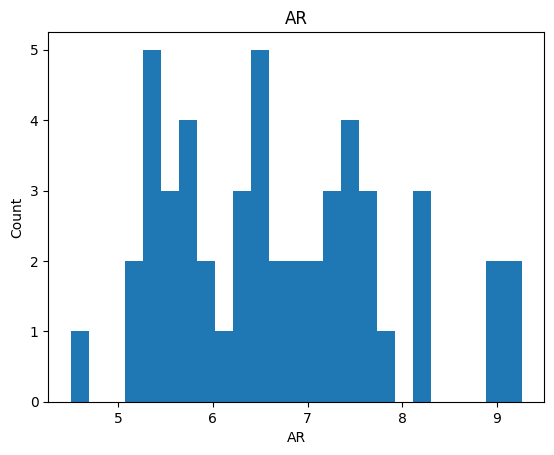

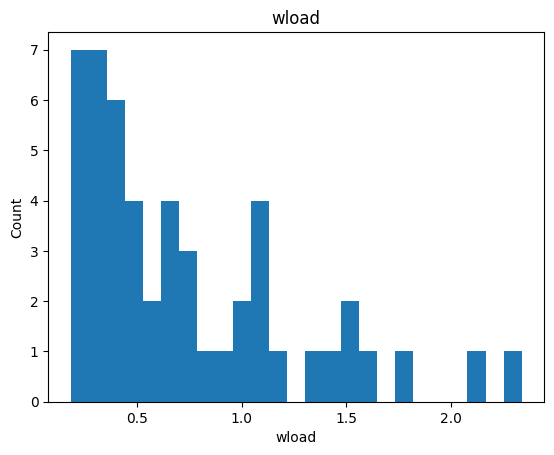

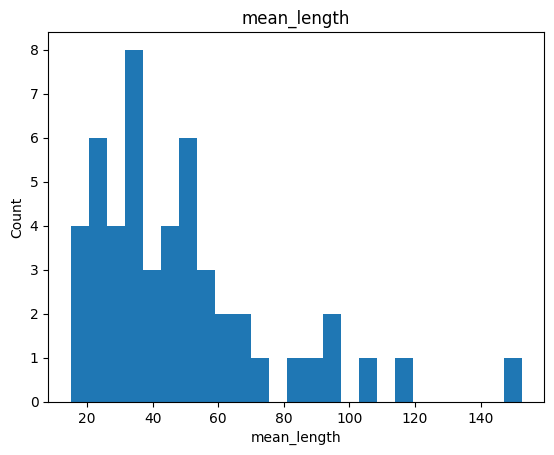

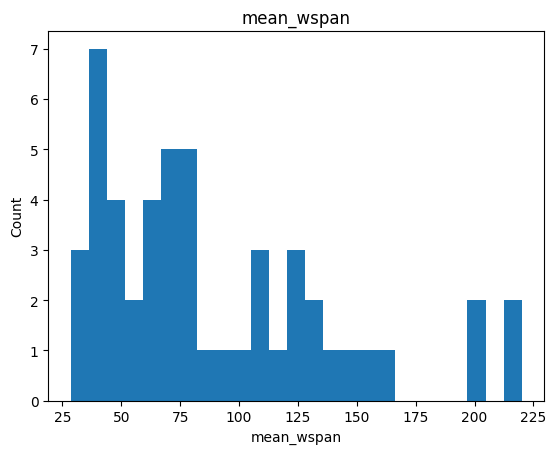

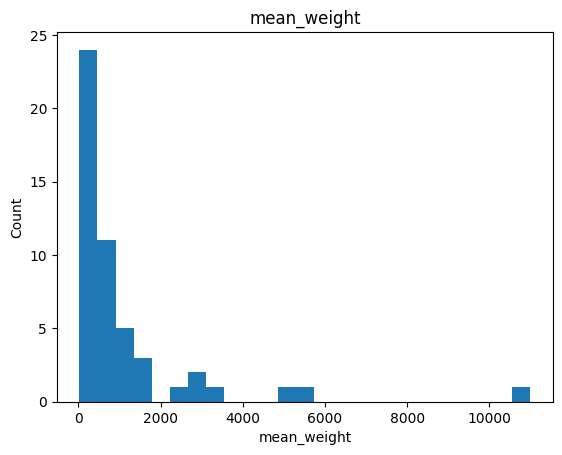

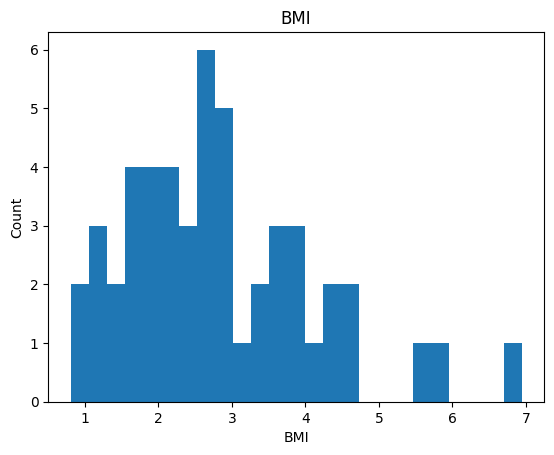

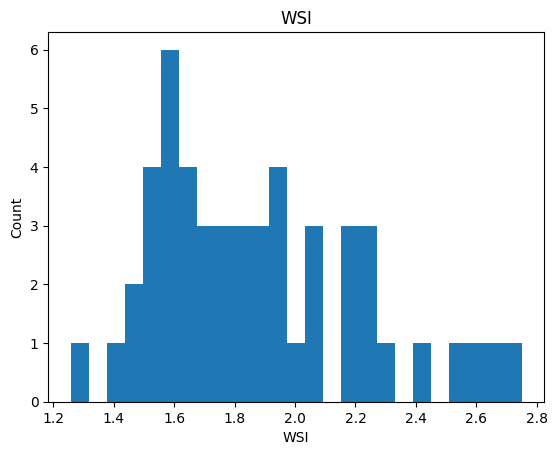

In [26]:
for i in birds.select_dtypes(include=['float64']).columns:
    plt.hist(birds[i], bins = 25)
    plt.title(i)
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
birds_num = birds.select_dtypes(include=['float64'])
birds_scaled = pd.DataFrame(scaler.fit_transform(birds_num), columns=birds_num.columns)
birds_scaled.head()

,AR,wload,mean_length,mean_wspan,mean_weight,BMI,WSI
0,0.762605,0.060185,0.152727,0.334204,0.022779,0.214481,0.879054
1,0.785714,0.212963,0.327273,0.558747,0.093394,0.343958,0.670654
2,0.785714,0.222222,0.367273,0.624021,0.125285,0.400416,0.671464
3,0.974790,0.027778,0.174545,0.242820,0.008884,0.000000,0.446080
4,0.939076,0.009259,0.145455,0.224543,0.007745,0.015081,0.526316


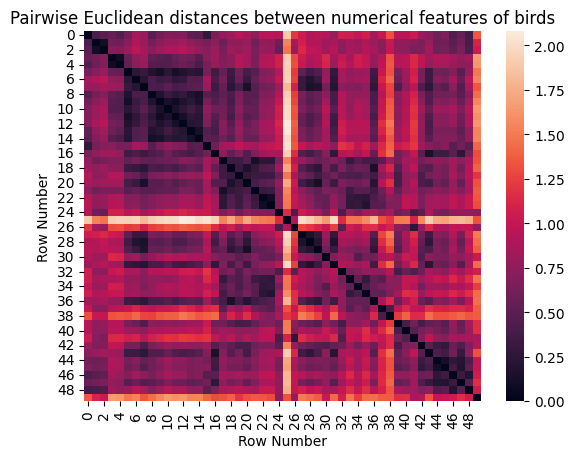

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.000000,0.412240,0.494961,0.537179,0.458502,0.614269,0.844823,0.798031,0.483868,0.602311,...,0.945243,1.045541,0.806295,0.720158,0.606286,0.658066,0.431060,0.557765,0.378187,1.351111
1,0.412240,0.000000,0.100755,0.607504,0.588298,0.713402,0.894036,0.788759,0.624433,0.722079,...,0.742517,0.708791,0.667645,0.790164,0.580133,0.601454,0.489592,0.597813,0.404217,1.111911
2,0.494961,0.100755,0.000000,0.693322,0.678988,0.793716,0.963168,0.843763,0.709864,0.806920,...,0.745752,0.656002,0.676412,0.849024,0.604778,0.625901,0.522463,0.646808,0.425812,1.036811
3,0.537179,0.607504,0.693322,0.000000,0.097289,0.558724,0.747743,0.806091,0.517132,0.479969,...,0.941824,1.122554,0.982712,0.819173,0.906038,0.893173,0.843769,0.772793,0.819415,1.658097
4,0.458502,0.588298,0.678988,0.097289,0.000000,0.527917,0.735403,0.788746,0.468235,0.450379,...,0.953783,1.136505,0.960636,0.781061,0.860565,0.856511,0.783774,0.727560,0.761523,1.634855
5,0.614269,0.713402,0.793716,0.558724,0.527917,0.000000,0.243948,0.302904,0.182761,0.112892,...,0.828375,1.069008,0.626720,0.334024,0.616545,0.584045,0.690634,0.476636,0.792848,1.488891
6,0.844823,0.894036,0.963168,0.747743,0.735403,0.243948,0.000000,0.226925,0.414222,0.317034,...,0.825348,1.103945,0.639994,0.325780,0.701961,0.642132,0.841146,0.566475,0.969449,1.545433
7,0.798031,0.788759,0.843763,0.806091,0.788746,0.302904,0.226925,0.000000,0.412983,0.403661,...,0.741083,0.959467,0.423306,0.253123,0.543506,0.481634,0.720250,0.465289,0.857201,1.340114
8,0.483868,0.624433,0.709864,0.517132,0.468235,0.182761,0.414222,0.412983,0.000000,0.182537,...,0.905566,1.088247,0.646703,0.434527,0.607821,0.603690,0.630586,0.503395,0.708963,1.453638
9,0.602311,0.722079,0.806920,0.479969,0.450379,0.112892,0.317034,0.403661,0.182537,0.000000,...,0.889452,1.125469,0.717948,0.437411,0.699389,0.671926,0.745136,0.554984,0.826393,1.556032


In [35]:
from scipy.spatial.distance import cdist
import seaborn as sns

cdist_matrix = cdist(birds_scaled, birds_scaled, metric='euclidean')
sns.heatmap(cdist_matrix)
plt.title('Pairwise Euclidean distances between numerical features of birds')
plt.xlabel('Row Number')
plt.ylabel('Row Number')
plt.show()
display(pd.DataFrame(cdist_matrix))

In [36]:
birds['back'].unique()

array(['light grey', 'bluish grey', 'grey', 'dappled brown',
       'black-brown', 'brown', 'greyish brown', 'black', 'dark brown',
       'beige', 'white', 'brownish black', 'greyish black',
       'blackish grey', 'black-white'], dtype=object)

In [37]:
birds['belly'].unique()

array(['white', 'dappled beige', 'black-white', 'black', 'beige',
       'dark brown', 'light grey', 'grey', 'dark grey', 'greyish black',
       'dappled brown', 'reddish brown', 'greyish white', 'brown-white',
       'brown'], dtype=object)

In [42]:
# black - black = 1
# black - greyish black = 0.75
# black - black-brown = 0.5
# black - blackish grey = 0.25
# black - brown = 0

main_colors = ['black', 'white', 'brown', 'grey', 'beige']

def split_color(a: str) -> list:
    if '-' in a:
        a_split = a.split('-')
    elif ' ' in a:
        a_split = a.split(' ')
    else:
        a_split = [a]
    return a_split

def color_similarity(a: str, b: str) -> float:
    a_split = split_color(a)
    b_split = split_color(b)

    intersection = set(a_split).intersection(set(b_split))
    
    if a_split == b_split:
        return 1.0
    elif any(i_color in main_colors for i_color in intersection):
        return 0.5
    else:
        return 0.0


In [ ]:
#overlap coeff

def get_categ_dist(a: pd.Series, b: pd.Series) -> float:
    sim = 0.0

    for i, j in zip(a,b):
        sim += color_similarity(i, j)

    return 1-(sim / len(a))


In [45]:
# combined distance

birds_categ = birds.drop(columns=['weight', 'length', 'wspan']).select_dtypes(include=['object'])

def mixed_metric(row1, row2):
    #Actualy lambda
    delta = len(birds_num.columns) / (len(birds_num.columns) + len(birds_categ.columns))
    return delta*l2(row1, row2)/l2_std+(1-delta)*goodall_instance.get_distance(row1, row2)/goodall_std